# Titanic Challenge Notebook

In [1]:
# standard libraries 
import os
import pandas as pd
import numpy as np 

%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# function to load our data 
def load_titanic_data(file):
    return pd.read_csv(file)

In [3]:
data_titanic = load_titanic_data("train.csv")
test_titanic = load_titanic_data("test.csv") # DO NOT LOOK AT

In [4]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Deal with some Null Values

In [5]:
# cannot remove embarked for test set ... fill nan embarked with mode
mode_embark = (data_titanic.mode().iloc[0])["Embarked"]
data_titanic["Embarked"] = data_titanic["Embarked"].fillna(mode_embark)

# fill age with mean
mean_age = data_titanic.mean()["Age"]
data_titanic["Age"] = data_titanic["Age"].fillna(mean_age)

/var/folders/sh/1qclfzm54zlgld8yp8_l0bbh0000gn/T/ipykernel_54936/3629574211.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_age = data_titanic.mean()["Age"]


In [6]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Look for Preliminary Correlations

In [7]:
corr_matrix = data_titanic.corr()
# check how much each attribute correlates with survival
corr_matrix["Survived"].sort_values(ascending=False)
# with new sex text to num transform, can see that sex has high negative correlation

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64

In [8]:
# remove some unwanted attributes (low correlation or lots of null data)
data_titanic.drop(["PassengerId", "Cabin", "Ticket", "Name"], axis=1, inplace=True)

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Age', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Fare', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>]], dtype=object)

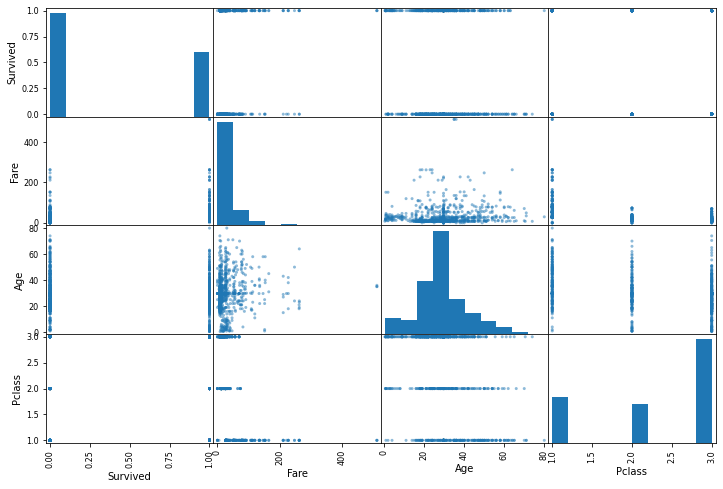

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Fare", "Age", "Pclass", "Sex"]
scatter_matrix(data_titanic[attributes], figsize=(12,8))

### Data Train and Eval Split

In [10]:
y_titanic = data_titanic["Survived"]
X_titanic = data_titanic.drop(["Survived"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


### Transform Text Attributes to Numerical Attributes

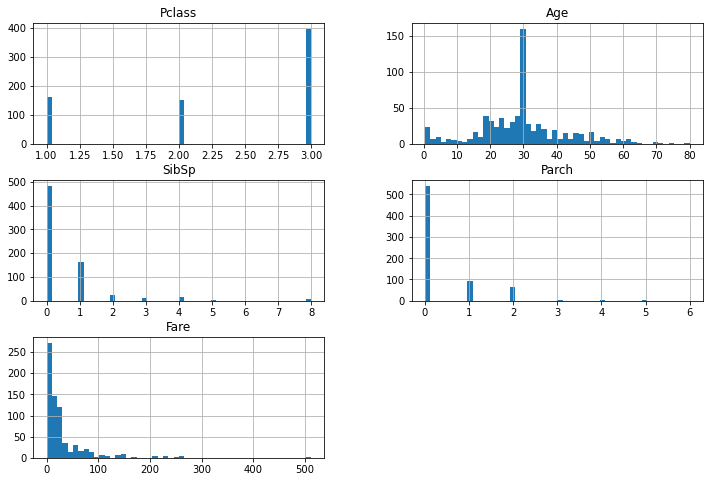

In [12]:
X_train.hist(bins=50, figsize=(12,8))
plt.show()

In [13]:
X_train_num = X_titanic.drop(["Sex", "Embarked"], axis=1)
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [14]:
# make sure the text attribs are still here
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


### Text Attribs to Numerical Attribs

In [15]:
# Scale numerical attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([ 
    ("scale", StandardScaler())
])

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(X_train_num)

ordinal_attribs = ["Sex"]
one_hot_attribs = ["Embarked"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("ordinal", OrdinalEncoder(), ordinal_attribs),
    ("one_hot_transformer", OneHotEncoder(), one_hot_attribs)
])

In [17]:
# transform the training and evaluation data
X_train_trans = full_pipeline.fit_transform(X_train)
X_val_trans = full_pipeline.fit_transform(X_val)

### Try out a SVM Classifier

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

run_cv = False

if run_cv:
    param_grid = [ 
        {"gamma": [0.001, 0.01, 0.1, 1, 10], "C": [1, 10, 100, 1000, 10000]}
    ]

    svm_clf = SVC(kernel="rbf", random_state=42, probability=True)
    clf = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5,
                            scoring="neg_log_loss", return_train_score=True, verbose=True)

    print(f"Best estimator = {clf.best_estimator_}")
else:
    clf = SVC(kernel="rbf", random_state=42, probability=True, gamma=0.01, C=1000)

clf.fit(X_train_trans, y_train)

SVC(C=1000, gamma=0.01, probability=True, random_state=42)

In [64]:
from sklearn.metrics import accuracy_score

y_pred_train = clf.predict(X_train_trans)
acc_score_train = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy = {acc_score_train}")

y_pred_val = clf.predict(X_val_trans)
acc_score_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy = {acc_score_val}")

Training Accuracy = 0.8441011235955056
Validation Accuracy = 0.7988826815642458


### Try out Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {"n_estimators": [1000, 1500], "max_depth": [2, 10, 50]}
]

forest_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
forest_grid = GridSearchCV(forest_clf, param_grid=param_grid,
                            scoring="neg_log_loss", return_train_score=True)
forest_grid.fit(X_train_trans, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'max_depth': [2, 10, 50],
                          'n_estimators': [1000, 1500]}],
             return_train_score=True, scoring='neg_log_loss')

In [98]:
forest_grid.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [101]:
forest_grid.best_estimator_.feature_importances_

array([0.10155746, 0.2026645 , 0.0546538 , 0.0395071 , 0.23525413,
       0.32495495, 0.01574124, 0.00841996, 0.01724686])

In [99]:
y_pred_train = forest_grid.predict(X_train_trans)
acc_score_train = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy = {acc_score_train}")

y_pred_val = forest_grid.predict(X_val_trans)
acc_score_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy = {acc_score_val}")

Training Accuracy = 0.9452247191011236
Validation Accuracy = 0.7877094972067039
